In [1]:
import pandas as pd

data = pd.read_csv('..\\Dataset\\Customers.csv')

print(data)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


In [2]:
from sklearn.feature_selection import VarianceThreshold

data = data[['Annual Income (k$)','Age','Spending Score (1-100)']]

selector = VarianceThreshold(threshold=0)
selected_features = selector.fit_transform(data)

data = pd.DataFrame(selected_features, columns=selector.get_feature_names_out())
print(data)

     Annual Income (k$)  Age  Spending Score (1-100)
0                    15   19                      39
1                    15   21                      81
2                    16   20                       6
3                    16   23                      77
4                    17   31                      40
..                  ...  ...                     ...
195                 120   35                      79
196                 126   45                      28
197                 126   32                      74
198                 137   32                      18
199                 137   30                      83

[200 rows x 3 columns]


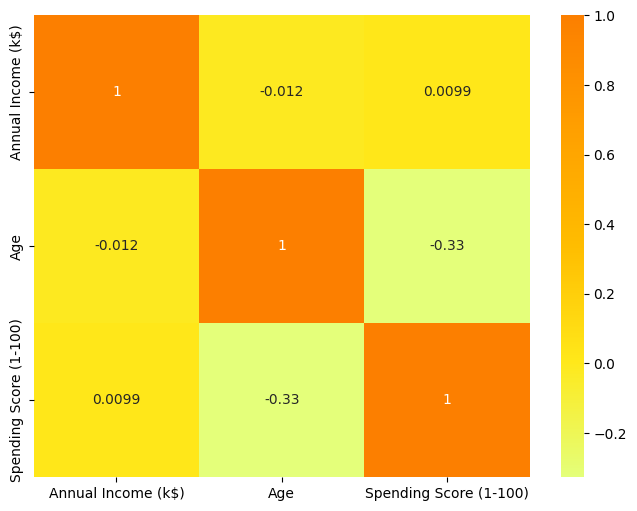

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Using Pearson Correlation
cor = data.corr()

plt.figure(figsize=(8,6))
sns.heatmap(cor, annot=True, cmap='Wistia')
plt.show()

In [4]:
corr_features = set()
for i in range(len(cor.columns)):
    for j in range(i):
        if abs(cor.iloc[i, j]) > 0.9:
            colname = cor.columns[i]
            corr_features.add(colname)

In [5]:
corr_features

set()

In [6]:
data = data.drop(corr_features, axis=1)
print(data)

     Annual Income (k$)  Age  Spending Score (1-100)
0                    15   19                      39
1                    15   21                      81
2                    16   20                       6
3                    16   23                      77
4                    17   31                      40
..                  ...  ...                     ...
195                 120   35                      79
196                 126   45                      28
197                 126   32                      74
198                 137   32                      18
199                 137   30                      83

[200 rows x 3 columns]
